# Forecast - Testing Notebook

This notebook is designed to test the functionality of `forecasting.py`. 
It validates each function step by step and ensures the outputs match expectations



In [2]:
# Import forecasting.py
import importlib.util

spec = importlib.util.spec_from_file_location("forecasting", "../../src/forecasting.py")
forecasting = importlib.util.module_from_spec(spec)
spec.loader.exec_module(forecasting)

In [3]:
# Load data
monthly_sales = forecasting.load_data("../../data/cleaned/sales_clean.csv")
monthly_sales.head()

,Order Date,Sales
0,2014-01-31,28953.706
1,2014-02-28,12743.108
2,2014-03-31,54801.906
3,2014-04-30,24710.016
4,2014-05-31,29639.834


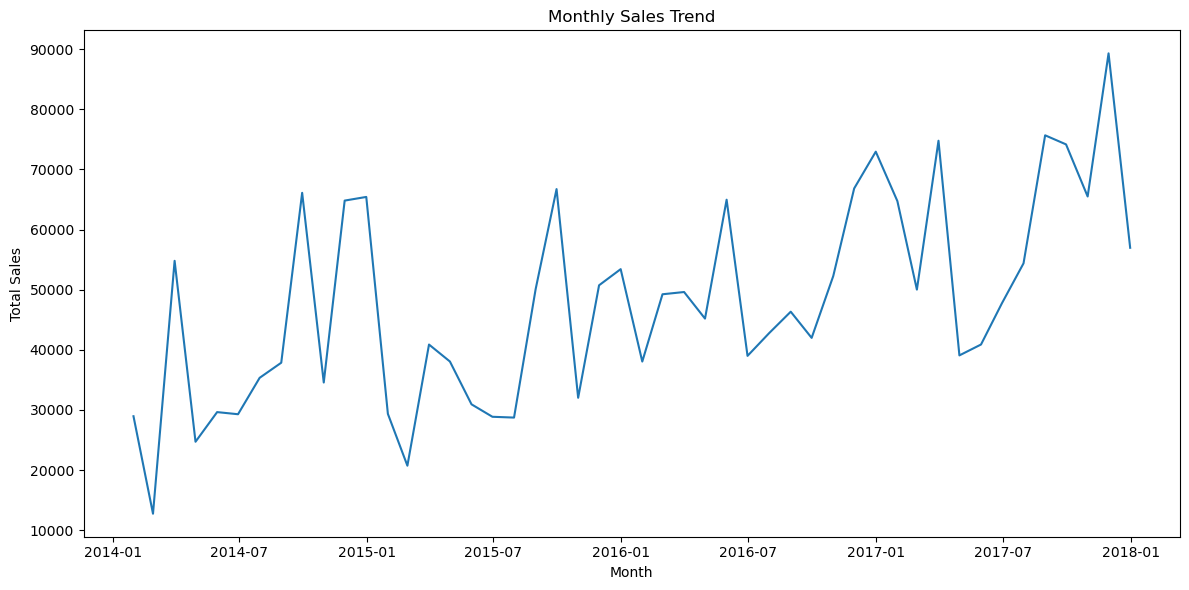

In [4]:
# Trend Visualization
forecasting.visualize_trend(monthly_sales)

12:14:51 - cmdstanpy - INFO - Chain [1] start processing
12:14:51 - cmdstanpy - INFO - Chain [1] done processing


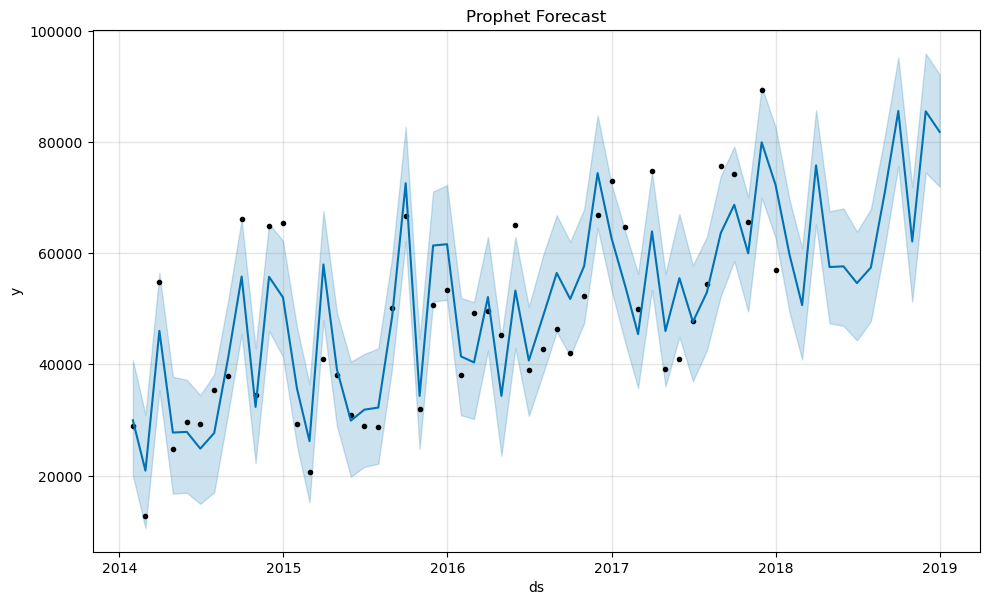

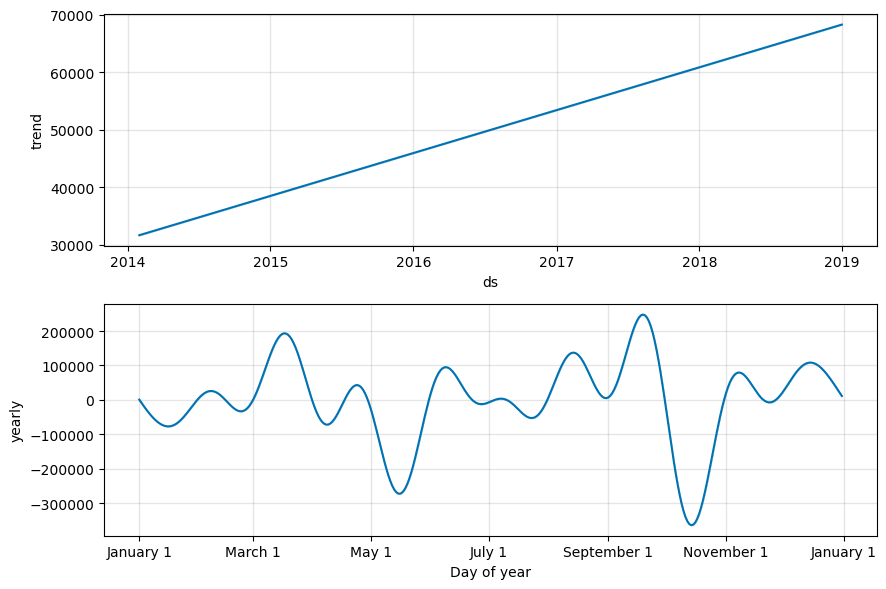

In [5]:
# Prophet forecast
forecast_prophet = forecasting.prophet_forecast(monthly_sales)

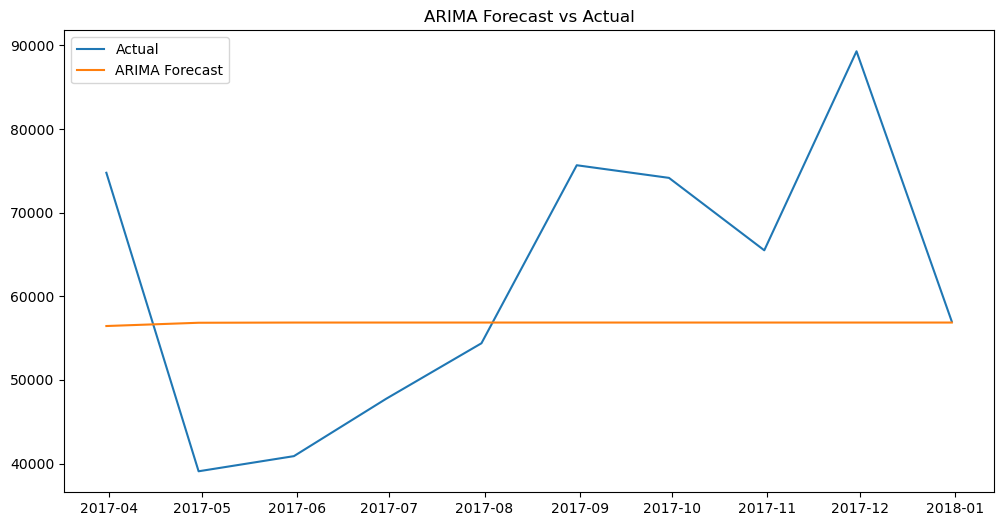

In [6]:
# ARIMA forecast
test, forecast_arima = forecasting.arima_forecast(monthly_sales)

In [7]:
# Compare accuracy
prophet_df = monthly_sales.rename(columns={"Order Date":"ds","Sales":"y"})
forecasting.compare_accuracy(prophet_df, forecast_prophet, test, forecast_arima)

Prophet MAE: 8320.632358347215 RMSE: 11164.885497569094
ARIMA MAE: 14097.83653149161 RMSE: 16663.714938503937


## Closing & Validation Notes

This testing notebook successfully validated the functionality of `forecasting.py`. By importing the script dynamically and running each function step by step, we confirmed that the forecasting pipeline works as intended:

- **Data Loading:** The `load_data()` function correctly reads the cleaned dataset and structures it into monthly sales.  
- **Visualization:** The `visualize_trend()` function produces clear line plots that highlight long-term growth patterns.  
- **Prophet Forecast:** The `prophet_forecast()` function generates forecasts with trend and seasonality components, providing interpretable insights into demand cycles.  
- **ARIMA Forecast:** The `arima_forecast()` function produces baseline forecasts, useful for comparison, even though less accurate than Prophet.  
- **Accuracy Comparison:** The `compare_accuracy()` function outputs MAE and RMSE metrics, confirming Prophet’s superior performance over ARIMA.

**Key takeaway:**  
This notebook demonstrates that the modular script (`src/forecasting.py`) is fully functional and can be reliably imported into different environments. It validates the end-to-end workflow: from data ingestion to visualization, forecasting, and model evaluation.  

**Practical implication:**  
With this testing notebook, the project now has both a reusable script for production (`src/forecasting.py`) and a transparent validation artifact (`notebooks/sandbox/02_forecasting_testing.ipynb`). This dual setup ensures reproducibility, clarity, and credibility when showcasing the project to collaborators or publishing it on GitHub/LinkedIn.